<a href="https://colab.research.google.com/github/reeda23/OpenCV102--Basic-Image-Processing-Operations/blob/main/7_image_gradients.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#import packages

import matplotlib.pyplot as plt
import numpy as np
import cv2

In [2]:
#func to show images

def plt_showimage(title, image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(image)
    plt.title(title)
    plt.grid(False)
    plt.show()

**Sobel and Scharr Kernel**

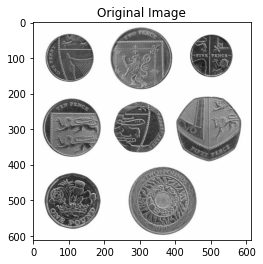

In [5]:
args = {
    "scharr": 0
}

#reading image
image = cv2.imread("/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt_showimage("Original Image", gray)

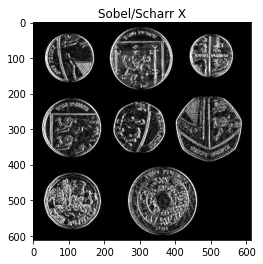

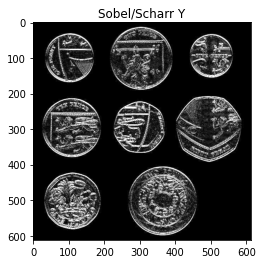

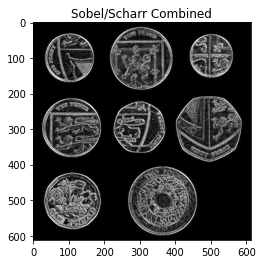

In [7]:
# set the kernel size, depending on whether we are using the Sobel
# operator of the Scharr operator, then compute the gradients along
# the x and y axis, respectively
ksize = -1 if args["scharr"] > 0 else 3
gX = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=1, dy=0, ksize=ksize)
gY = cv2.Sobel(gray, ddepth=cv2.CV_32F, dx=0, dy=1, ksize=ksize)

# the gradient magnitude images are now of the floating point data
# type, so we need to take care to convert them back a to unsigned
# 8-bit integer representation so other OpenCV functions can operate
# on them and visualize them

gX = cv2.convertScaleAbs(gX)
gY = cv2.convertScaleAbs(gY)

#combine the gradient values 
combined = cv2.addWeighted(gX, 0.5, gY, 0.5, 0)

#show output images 
plt_showimage("Sobel/Scharr X",gX)
plt_showimage("Sobel/Scharr Y",gY)
plt_showimage("Sobel/Scharr Combined", combined)


**Gradient Magnitude and Orientation**

In [9]:
#read image 
image = cv2.imread("/content/drive/MyDrive/OpenCV102 - Basic Image Processing Operations/coins.jpg")
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

#computing gradients
gX = cv2.Sobel(gray, cv2.CV_64F, 1, 0)
gY = cv2.Sobel(gray, cv2.CV_64F, 0, 1)

#compute gradient magnitude and orientation
magnitude = np.sqrt((gX**2)+(gY**2))
orientation = np.arctan2(gX,gY) * (180/np.pi) % 180

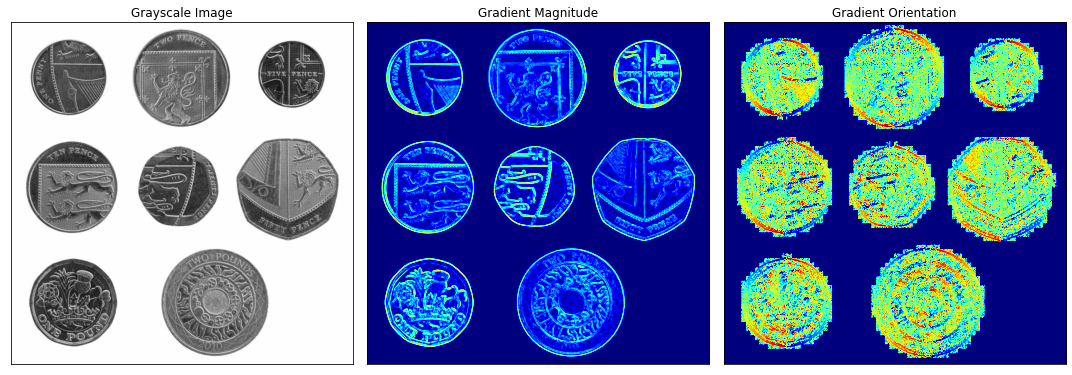

In [15]:
#displaying fig

(fig, axs) = plt.subplots(nrows = 1, ncols = 3, figsize= (15,10))

#ploting each of the image
axs[0].imshow(gray, cmap="gray")
axs[0].set_title("Grayscale Image")

axs[1].imshow(magnitude, cmap="jet")
axs[1].set_title("Gradient Magnitude")

axs[2].imshow(orientation, cmap="jet")
axs[2].set_title("Gradient Orientation")

#turn off the axes
for i in range(0, 3):
    axs[i].get_xaxis().set_ticks([])
    axs[i].get_yaxis().set_ticks([])

plt.tight_layout()
plt.show()